<a href="https://colab.research.google.com/github/Zahra-Asghari/Compartmentalmodels-in-epidemiology/blob/main/SIRD_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install matplotlib
!pip install numpy

In [4]:
import matplotlib.pyplot as plt
import numpy as np

  #1 DATASET

  #observed infected
oI = np.array([    3,     3,     3,     3,     3,     4,    19,
                    75,   152,   221,   310,   455,   593,   822,
                  1049,  1577,  1835,  2263,  2706,  3296,  3916,
                  5061,  6387,  7985,  8514, 10590, 12839, 14955,
                 17750, 20603, 23073, 26062, 28710, 33190, 37860,
                 42681, 46638, 50418, 54030, 57521, 62013, 66414 ])
  #observed recovered
oR = np.array([    0,     0,     0,     0,     0,     0,     1,
                     2,     2,     2,     3,     4,    46,    47,
                    51,    84,   150,   161,   277,   415,   524,
                   590,   623,   725,  1005,  1046,  1259,  1440,
                  1967,  2336,  2750,  2942,  4026,  4441,  5130,
                  6073,  7025,  7433,  8327,  9363, 10362, 10951 ])
  #observed dead
oD = np.array([   0,     0,      0,     0,     0,     0,     1,
                    2,     3,      7,    11,    12,     7,    21,
                   29,    41,     52,    79,   107,   148,   197,
                  233,   366,    463,   631,   827,  1016,  1266,
                 1441,  1809,   2158,  2503,  2978,  3405,  4032,
                 4825,  5476,   6077,  6820,  7503,  8215,  9134 ])
  #observed susceptibles
N = 100000  #population size
T = oI.size    #observation horizon

oS = np.zeros((T,))

for t in range(0, T):
      oS[t] = N-(oI[t]+oR[t]+oD[t])

  ##############################################################################



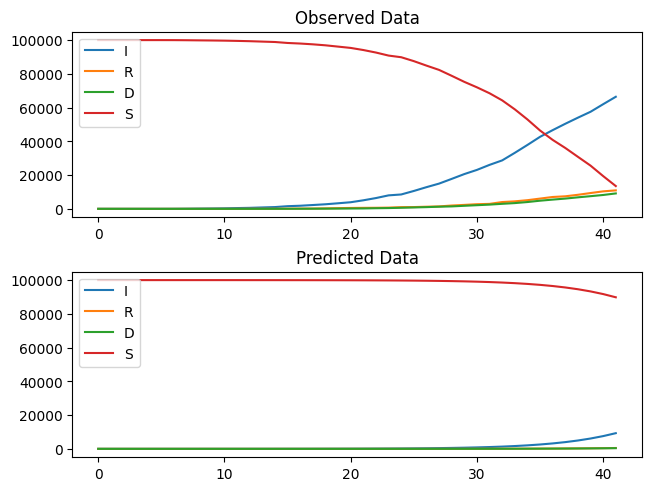

In [5]:
 #2 LEAST SQUARES ESTIMATION OF THE PARAMETER

  #initializazion of RT and thetatildeT
RT = np.zeros((3,3))
thetatildeT = np.zeros((3,))

  #construction of RT and thetatildeT
for t in range(1, T):
      #definition of phit and Deltayt
    phit = np.array([  [-oS[t-1]*oI[t-1]/N,          0,         0],
                         [ oS[t-1]*oI[t-1]/N,   -oI[t-1],  -oI[t-1]],
                         [                 0,    oI[t-1],         0],
                         [                 0,          0,   oI[t-1]]  ])

    Deltayt = np.array([oS[t]-oS[t-1], oI[t]-oI[t-1],
                          oR[t]-oR[t-1], oD[t]-oD[t-1] ])

      #accumulation in RT and thetatildeT
    RT += np.dot(phit.transpose(),phit)
    thetatildeT += np.dot(phit.transpose(), Deltayt)

  #least squares estimation
thetaLS = np.dot(np.linalg.inv(RT), thetatildeT)

  ##############################################################################

  #3 PREDICTION

  #prediction model parameters
alpha = thetaLS[0]
beta = thetaLS[1]
gamma = thetaLS[2]

  #initialization of the prediction model variables
S = np.zeros((T,))
I = np.zeros((T,))
R = np.zeros((T,))
D = np.zeros((T,))

  #initial condition of the prediction
S[0] = N-1
I[0] = 1
R[0] = 0
D[0] = N-(S[0]+I[0]+R[0])

  #simulation
for t in range(1,T):
     S[t] = S[t-1]-alpha*(S[t-1]*I[t-1]/N)
     I[t] = I[t-1]+alpha*(S[t-1]*I[t-1]/N)-beta*I[t-1]-gamma*I[t-1]
     R[t] = R[t-1]+beta*I[t-1]
     D[t] = D[t-1]+gamma*I[t-1]

  ###################
  ##########################################################

  #4 PLOTS
fig, axs = plt.subplots(2, 1, constrained_layout=True)

axs[0].set_title('Observed Data')
axs[0].plot(range(0,T), oI)
axs[0].plot(range(0,T), oR)
axs[0].plot(range(0,T), oD)
axs[0].plot(range(0,T), oS)
axs[0].legend("IRDS 1",loc="upper left")

axs[1].set_title('Predicted Data')
axs[1].plot(range(0,T), I)
axs[1].plot(range(0,T), R)
axs[1].plot(range(0,T), D)
axs[1].plot(range(0,T), S)
axs[1].legend("IRDS 1",loc="upper left")